In [23]:
# Importing relevant libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
def laplacian_filter(img: np.ndarray, sum_with_image: bool = False, include_diagonals: bool = False) -> np.ndarray:
    """
    Applies the laplace filter to an image

    Args:
        img (np.ndarray): the image that will be transformed.
        sum_with_image (bool): a boolean that defines if the original pixel is added to the laplacian pixel
        include_diagonals (bool): a boolean that defines if the diagonals of the pixel will be included in the operation

    Returns:
        np.ndarray: The new image with the applied filter
    """
    # Defining the kernel to be used
    laplacian_kernel = np.array([[1, 1, 1], 
                        [1, -8, 1], 
                        [1, 1, 1]]) if include_diagonals else np.array([
                            [0,1,0],
                            [1,-4,1],
                            [0,1,0]])
    # Defining the kernel size and creating a padded image
    kernel_size = 3
    padding_size = kernel_size // 2 
    padded_image = np.pad(img, padding_size, mode = 'edge')

    # Creating the new image
    new_img = np.zeros_like(img, dtype = np.int16)

    rows, cols = img.shape
    # Now the filter is applied
    c_val = -1
    for r in range(rows):
        for c in range(cols):
            region = padded_image[r:r+kernel_size , c:c+kernel_size]

            laplace_val = np.sum(region * laplacian_kernel)
            val = img[r, c] + c_val * laplace_val if sum_with_image else laplace_val
            new_img[r, c] = val 

    return new_img

In [25]:
def adjust_scale(img: np.ndarray, k = 255) -> np.ndarray:
    """
    Adjusts the scale of a image by subtracting the minimum value, dividing by the maximum and 
    multypling by a constant k

    Args:
        img (np.ndarray): The array of the image to be transformed
        k (int): The constant that will be the new maximum image value
    
    Returns:
        np.ndarray: The adjusted image array
    """

    im_min = np.min(img)
    im_max = np.max(img)
    fm = img - im_min
    fs = k * (fm/(im_max - im_min))

    return np.clip(fs, 0, k).astype(np.uint8)

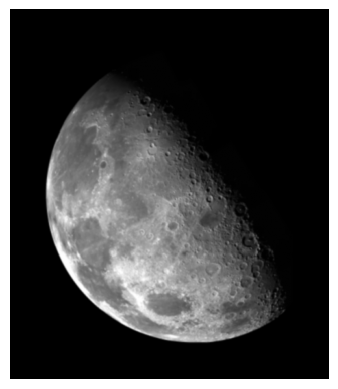

In [26]:
# Opening and displaying the image
ORIGINAL_IMAGE_BGR = cv2.imread("Fig0338(a)(blurry_moon).tif")
ORIGINAL_IMAGE_GRAY = cv2.cvtColor(ORIGINAL_IMAGE_BGR, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(ORIGINAL_IMAGE_GRAY, cmap="gray")
plt.show()

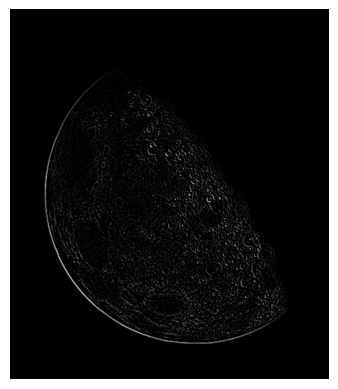

In [27]:
# Applying the Laplacian filter alone and displaying in the way the book described:
# Values lower than zero turning to zero
TRANSFORMED_IMG = laplacian_filter(ORIGINAL_IMAGE_GRAY)
EXHIBIT_IMAGE = np.clip(TRANSFORMED_IMG, 0, 255).astype(np.uint8)

plt.axis("off")
plt.imshow(EXHIBIT_IMAGE, cmap="gray")
plt.show()

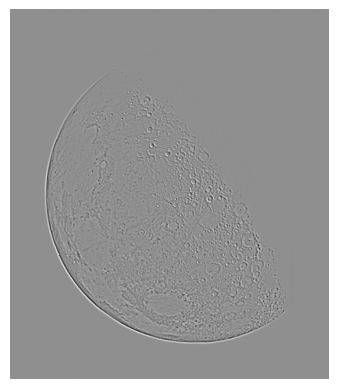

In [28]:
# Then the original image is adjusted using adjust_scale
ADJUSTED_IMG = adjust_scale(TRANSFORMED_IMG)

plt.axis("off")
plt.imshow(ADJUSTED_IMG, cmap="gray")
plt.show()

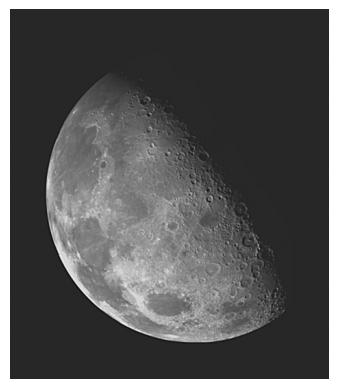

In [29]:
# The original image is added to the Laplacian image
TRANSFORMED_ADJUSTED_IMG = laplacian_filter(ORIGINAL_IMAGE_GRAY, sum_with_image=True)

plt.axis("off")
plt.imshow(TRANSFORMED_ADJUSTED_IMG, cmap="gray")
plt.show()

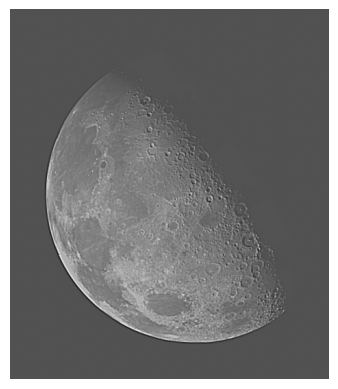

In [30]:
# The Laplacian filter with the edges included is performed and the result is
# added to the original image
IMG_TRANSFORMED_EDGES = laplacian_filter(ORIGINAL_IMAGE_GRAY, sum_with_image=True, include_diagonals=True)

plt.axis("off")
plt.imshow(IMG_TRANSFORMED_EDGES, cmap="gray")
plt.show()

In [31]:
# Now the results are saved in a "results" file
output_path = os.path.join("./results", f"laplacian_moon.png")
cv2.imwrite(output_path, TRANSFORMED_IMG)
output_path = os.path.join("./results", f"adjusted_moon.png")
cv2.imwrite(output_path, ADJUSTED_IMG)
output_path = os.path.join("./results", f"transformed_adjusted_moon.png")
cv2.imwrite(output_path, TRANSFORMED_ADJUSTED_IMG)
output_path = os.path.join("./results", f"transformed_edges_moon.png")
cv2.imwrite(output_path, IMG_TRANSFORMED_EDGES)

True